In [1]:
import tensorflow as tf
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np 
import os
import PIL.Image as Image
import seaborn as sns
from sklearn.metrics import roc_curve
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# load images

In [2]:
IMG_HEIGHT, IMG_WIDTH = 128, 128

test_dir = "./images/to_predict/"

test_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=0,
    width_shift_range=0,
    height_shift_range=0,
    brightness_range=(1.0, 1.0),
    horizontal_flip=False,
    vertical_flip=False
)

# to count all images
nr_images = 0
for imgDir in os.listdir(test_dir):
    for img in os.listdir(test_dir + imgDir):
        nr_images+=1
        
test_data = test_image_generator.flow_from_directory(batch_size=nr_images,
                                                           directory=test_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))

test_images, labels = ns(test_data)

class_labels = {v:k for k,v in test_data.class_indices.items()}

Found 76 images belonging to 4 classes.


# function definitions

In [3]:
def predict(model):
    prediction_classes = []
    actual_classes = []    
   
    for img, label in zip(test_images, labels):
        actual_class = np.argmax(label)
        actual_label = class_labels[actual_class]
        
        prediction = model.predict(img[np.newaxis,:])
        
        predicted_class = np.argmax(prediction[0], axis=-1)
        predicted_label = class_labels[predicted_class]
        
        prediction_classes.append(predicted_class)
        actual_classes.append(actual_class)
        
    
    return (prediction_classes, actual_classes)


In [4]:
def create_confusion_matrix(model, result):
    prediction,actual = result
    
    confusion = tf.math.confusion_matrix(labels=actual, predictions=prediction, num_classes=4).numpy()
    ticklabels = list(class_labels.values())
    
    figure = plt.figure(figsize=(8, 8))
    sns.heatmap(confusion, annot=True,cmap=plt.cm.Greens, xticklabels=ticklabels, yticklabels=ticklabels)
    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [5]:
def create_roc(model, result):    
    prediction,actual = result
    
    fpr = dict()
    tpr = dict()
    
    # index is class, inner values are binaries if it was classified true or false
    actual_per_class = [[],[],[],[]]
    predicted_per_class = [[],[],[],[]]
    
    
    for i in range(len(prediction)):
        a = actual[i]
        p = prediction[i]
        for c in range(4):
            actual_per_class[c].append(1 if a == c else 0)
            predicted_per_class[c].append(1 if p == c else 0)
    
    for i in range(4):
        fpr[i], tpr[i], _ = roc_curve(predicted_per_class[i], actual_per_class[i])
        
    # Plot all ROC curves
    plt.figure(1)
    colors = cycle(['red', 'blue', 'yellow', 'green'])
    for i, color in zip(range(4), colors):
        plt.plot(fpr[i], tpr[i], color=color,
                 label='ROC curve of class %s' % class_labels[i])
                 
        
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()    

In [6]:
def calc_accuracy(result):    
    prediction,actual = result
    
    correct = 0
    max = len(prediction)
    
    for i in range(0, len(prediction)):
        if prediction[i] == actual[i]:
            correct+=1
    
    return correct / max

In [7]:
def create_analysis(name):
    print(name)
    model = tf.keras.models.load_model('models/%s.h5' % name)
    result = predict(model)
    print("")
    print("accuracy: %f" % calc_accuracy(result))
  
    create_confusion_matrix(model, result)
    create_roc(model, result)


# model 1 (batchsize=32)

drink-detection-model1-g1

accuracy: 0.592105


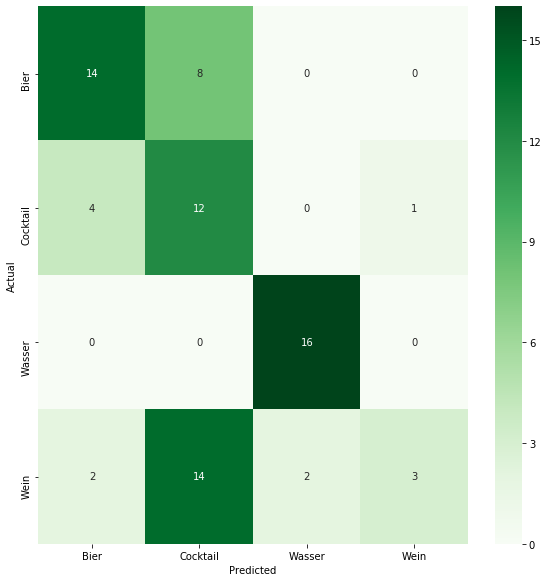

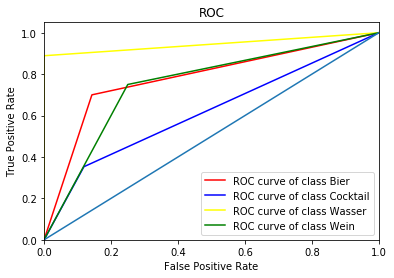

In [8]:
create_analysis("drink-detection-model1-g1")

# model 1 (batchsize=16)

drink-detection-model1-g2

accuracy: 0.684211


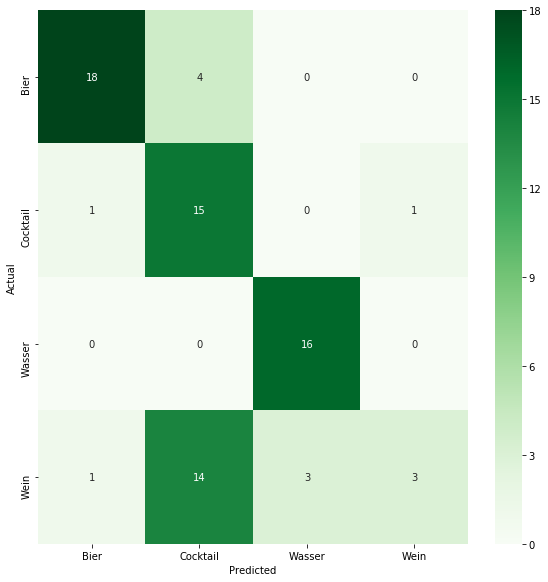

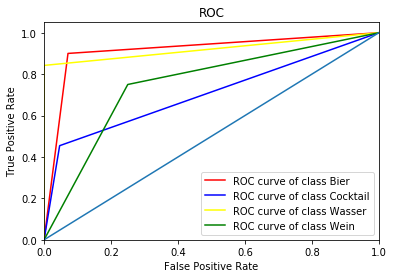

In [9]:
create_analysis("drink-detection-model1-g2")

# model 2 (batchsize=32)

drink-detection-model2-g1

accuracy: 0.710526


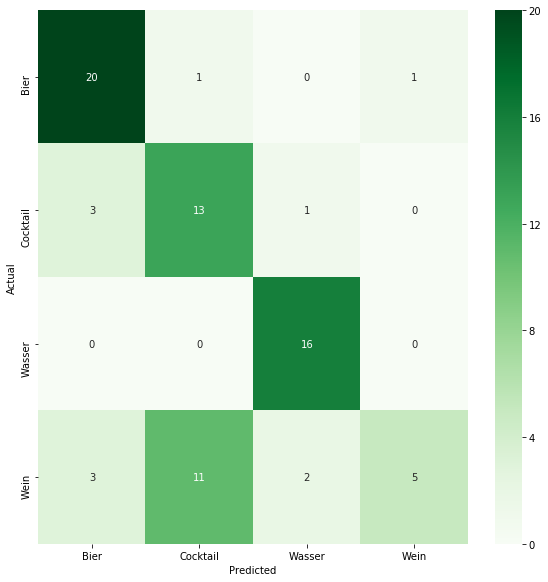

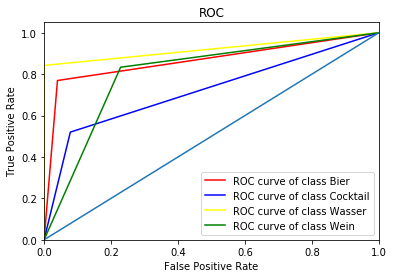

In [10]:
create_analysis("drink-detection-model2-g1")

# model 2 (batchsize=16)

drink-detection-model2-g2

accuracy: 0.736842


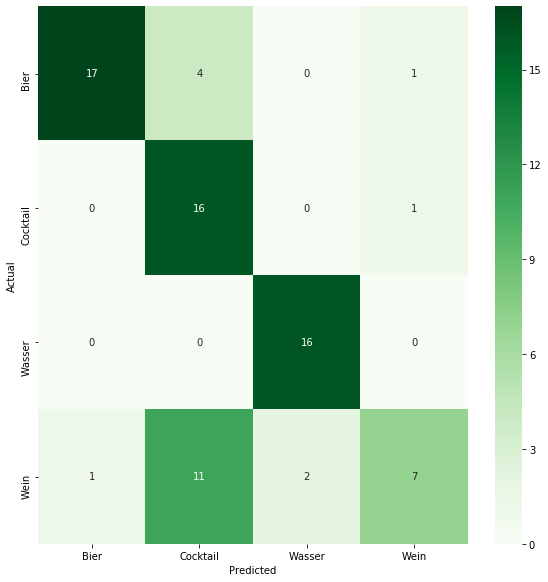

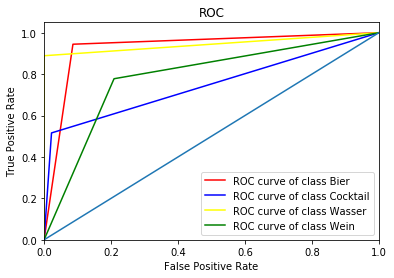

In [11]:
create_analysis("drink-detection-model2-g2")